In [118]:
# Import appropriate modules
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [119]:
# Import Data set
employee = pd.DataFrame(pd.read_csv("C:\\Users\\dalvi\\Downloads\\Employee Turnover Dataset 1 .csv", na_values='.'))
num_rows, num_columns = employee.shape

# Describe the general characteristcs of the inital dataset (e.g., rows, columns)

print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 10322 rows and 35 columns.


In [120]:
# Verify import of data set 
employee.head(3)

,Age,Turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,33.0,Yes,Non-Travel,241,Hardware,16,3,Technical Degree,1,3505,...,1,80,4,35.0,4.0,4,13,2,8.0,11
1,35.0,Yes,Non-Travel,679,Support,7,2,Life Sciences,1,1129,...,1,80,1,5.0,1.0,1,4,3,3.0,4
2,27.0,Yes,Travel_Frequently,359,Hardware,50,1,Life Sciences,1,6305,...,4,80,4,10.0,4.0,2,4,2,4.0,2


In [121]:
# Describe the data set 
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,10321.000000,10322.000000,10322.000000,10322.000000,10322.000000,10322.000000,10322.000000,10322.000000,10322.000000,10322.000000,...,10322.000000,10322.000000,10322.0,10322.000000,10321.000000,9904.000000,10322.000000,10322.000000,10322.000000,10320.000000
mean,39.045538,806.363495,26.127882,2.973939,0.999806,5048.809921,2.492637,114.789382,2.510172,3.007750,...,2.500000,2.492346,80.0,2.495543,20.538804,3.488590,2.487599,10.684073,5.814668,5.878295
std,12.563238,404.881817,53.149200,1.417019,0.034098,2914.561566,1.117284,49.453829,1.115439,1.401737,...,1.124396,1.114590,0.0,1.117646,11.736896,1.708504,1.117759,8.813084,5.910980,6.014995
min,12.000000,100.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,1.000000,80.0,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,455.250000,13.000000,2.000000,1.000000,2532.250000,1.000000,72.000000,2.000000,2.000000,...,1.000000,2.000000,80.0,2.000000,10.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,39.000000,806.000000,25.000000,3.000000,1.000000,5093.500000,2.000000,115.000000,3.000000,3.000000,...,3.000000,2.000000,80.0,2.000000,21.000000,3.000000,2.000000,8.000000,4.000000,4.000000
75%,50.000000,1159.000000,38.000000,4.000000,1.000000,7556.750000,3.000000,158.000000,4.000000,4.000000,...,4.000000,3.000000,80.0,3.750000,30.000000,5.000000,3.000000,16.000000,8.000000,8.000000
max,148.000000,1500.000000,3737.000000,5.000000,3.000000,10000.000000,4.000000,200.000000,4.000000,5.000000,...,4.000000,4.000000,80.0,4.000000,222.000000,6.000000,4.000000,40.000000,39.000000,38.000000


In [122]:
# Identify data types of each variable
print(employee.dtypes)

Age                         float64
Turnover                     object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [123]:
# Identify quantitatative variables 
employee_quant = ['Age', 'EmployeeCount','EmployeeNumber','NumCompaniesWorked','StandardHours','YearsAtCompany','YearsInCurrentRole',
'YearsSinceLastPromotion','YearsWithCurrManager','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears']

# Identify quantitative variable data types
employee[employee_quant].dtypes

type(employee_quant)


list

In [124]:
# Identify qualitative variables
employee_qual = ['Turnover','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18',
'OverTime','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating',
'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

# Identify qualitative variable data types
employee[employee_qual].dtypes

Turnover                    object
BusinessTravel              object
Department                  object
EducationField              object
Gender                      object
JobRole                     object
MaritalStatus               object
Over18                      object
OverTime                    object
Education                    int64
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
WorkLifeBalance              int64
dtype: object

In [125]:
# Identify duplicate rows
duplicates = employee.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")
print("\n\n")


Number of duplicate entries: 298





In [126]:
# Drop duplicate rows
print("Findings for each quality issue: ")
employee = employee.drop_duplicates()
duplicates = employee.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")
print("\n\n")



Findings for each quality issue: 
Number of duplicate entries: 0





In [127]:
total_missing_values = employee.isna().sum().sum()
print('Total missing values: ', total_missing_values)
#print(employee.isna().sum())

Total missing values:  430


In [128]:

# Categorical Variable Inconsistency analysis
affirm = ['Yes', 'No']
travel_set = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
gender_set = ['Male', 'Female']
yes_set = ['Y']
marital_set = ['Married', 'Divorced', 'Single']

# Turnover Inspection
Invalid_Turnover = employee[~employee['Turnover'].isin(affirm)]
print("Invalid Turnover Indices:")
print(Invalid_Turnover.index)
print("\n\n")  


# Business Travel inspection
Invalid_BusinessTravel = employee[~employee['BusinessTravel'].isin(travel_set)]   
print("Invalid Business Travel Indices:")
print(Invalid_BusinessTravel.index)    
print("\n\n")

# Gender Inspection
Invalid_Gender = employee[~employee['Gender'].isin(gender_set)] 
print("Invalid Gender Indices:")
print(Invalid_Gender.index)    
print("\n\n")

# Marital Status
Invalid_Marital = employee[~employee['MaritalStatus'].isin(marital_set)]
print("Invalid Marital Status Indices:")
print(Invalid_Marital.index)    
print("\n\n")

# Over 18
Invalid_Over18 = employee[~employee['Over18'].isin(yes_set)]   
print("Invalid Over 18 Indices:")
print(Invalid_Over18.index)    
print("\n\n")

# OverTime
Invalid_OverTime = employee[~employee['OverTime'].isin(affirm)]
print("Invalid Overtime Indices:")
print(Invalid_OverTime.index)     
print("\n\n")



    

Invalid Turnover Indices:
Index([], dtype='int64')



Invalid Business Travel Indices:
Index([2012, 2120, 8189, 9418], dtype='int64')



Invalid Gender Indices:
Index([482, 5489, 5698], dtype='int64')



Invalid Marital Status Indices:
Index([], dtype='int64')



Invalid Over 18 Indices:
Index([], dtype='int64')



Invalid Overtime Indices:
Index([], dtype='int64')





In [129]:
# Categorical Variable Nullification of Inconsistent Values

# Turnover Nullify
employee['Turnover'] = employee['Turnover'].where(employee['Turnover'].isin(affirm), np.nan)

# Business Travel Nullify
employee['BusinessTravel'] = employee['BusinessTravel'].where(employee['BusinessTravel'].isin(travel_set), np.nan)
    
# Gender Nullify
employee['Gender'] = employee['Gender'].where(employee['Gender'].isin(gender_set), np.nan)
print(employee.isna().sum())

Age                           1
Turnover                      0
BusinessTravel                4
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                1
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        3
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 1
MonthlyRate                   2
NumCompaniesWorked            1
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             1
TrainingTimesLastYear       418
WorkLifeBalance               0
YearsAtC

In [130]:
# Numeric Variable Inconsistency analysis
Age = list(range(151))
Education = list(range(1,6))
EmployeeCount = list(range(2))
EmployeeNumber = list(range(1,10001))
EnvironmentSatisfaction = list(range(1,5)) 
JobInvolvement = list(range(1,5))
JobLevel = list(range(1,6))
JobSatisfaction = list(range(1,5))
PerformanceRating = list(range(1,5))
RelationshipSatisfaction = list(range(1,5))
StockOptionLevel = list(range(1,5))
WorkLifeBalance = list(range(1,5))


# Age Inspection
Invalid_Age = employee[~employee['Age'].isin(Age)]
print("Invalid Age Indices:")
print(Invalid_Age.index)
print("\n\n") 

# Education Inspection
Invalid_Education = employee[~employee['Education'].isin(Education)]
print("Invalid Education Indices:")
print(Invalid_Education.index)
print("\n\n") 

# Employee Count Inspection
Invalid_EmployeeCount = employee[~employee['EmployeeCount'].isin(EmployeeCount)]
print("Invalid EmployeeCount Indices:")
print(Invalid_EmployeeCount.index)
print("\n\n") 

# EmployeeNumber Inspection
Invalid_EmployeeNumber = employee[~employee['EmployeeNumber'].isin(EmployeeNumber)]
print("Invalid EmployeeNumber Indices:")
print(Invalid_EmployeeNumber.index)
print("\n\n") 

# EnvironmentSatisfaction Inspection
Invalid_EnvironmentSatisfaction = employee[~employee['EnvironmentSatisfaction'].isin(EnvironmentSatisfaction)]
print("Invalid EnvironmentSatisfaction Indices:")
print(Invalid_EnvironmentSatisfaction.index)
print("\n\n") 

# JobInvolvement Inspection
Invalid_JobInvolvement = employee[~employee['JobInvolvement'].isin(JobInvolvement)]
print("Invalid JobInvolvement Indices:")
print(Invalid_JobInvolvement.index)
print("\n\n") 

# JobLevel Inspection
Invalid_JobLevel = employee[~employee['JobLevel'].isin(JobLevel)]
print("Invalid JobLevel Indices:")
print(Invalid_JobLevel.index)
print("\n\n") 

# JobSatisfaction Inspection
Invalid_JobSatisfaction = employee[~employee['JobSatisfaction'].isin(JobSatisfaction)]
print("Invalid JobSatisfaction Indices:")
print(Invalid_JobSatisfaction.index)
print("\n\n") 

# PerformanceRating Inspection
Invalid_PerformanceRating = employee[~employee['PerformanceRating'].isin(PerformanceRating)]
print("Invalid PerformanceRating Indices:")
print(Invalid_PerformanceRating.index)
print("\n\n") 

# RelationshipSatisfaction Inspection
Invalid_RelationshipSatisfaction = employee[~employee['RelationshipSatisfaction'].isin(RelationshipSatisfaction)]
print("Invalid RelationshipSatisfaction Indices:")
print(Invalid_RelationshipSatisfaction.index)
print("\n\n") 

# StockOptionLevel Inspection
Invalid_StockOptionLevel = employee[~employee['StockOptionLevel'].isin(StockOptionLevel)]
print("Invalid StockOptionLevel Indices:")
print(Invalid_StockOptionLevel.index)
print("\n\n") 

# WorkLifeBalance Inspection
Invalid_WorkLifeBalance = employee[~employee['WorkLifeBalance'].isin(WorkLifeBalance)]
print("Invalid WorkLifeBalance Indices:")
print(Invalid_WorkLifeBalance.index)
print("\n\n") 

Invalid Age Indices:
Index([5638], dtype='int64')



Invalid Education Indices:
Index([], dtype='int64')



Invalid EmployeeCount Indices:
Index([140, 7167, 7877], dtype='int64')



Invalid EmployeeNumber Indices:
Index([], dtype='int64')



Invalid EnvironmentSatisfaction Indices:
Index([], dtype='int64')



Invalid JobInvolvement Indices:
Index([], dtype='int64')



Invalid JobLevel Indices:
Index([], dtype='int64')



Invalid JobSatisfaction Indices:
Index([], dtype='int64')



Invalid PerformanceRating Indices:
Index([], dtype='int64')



Invalid RelationshipSatisfaction Indices:
Index([], dtype='int64')



Invalid StockOptionLevel Indices:
Index([], dtype='int64')



Invalid WorkLifeBalance Indices:
Index([], dtype='int64')





In [131]:
# Numeric Variable Nullification of Inconsistent Values

# Age Nullify
employee['Age'] = employee['Age'].where(employee['Age'].isin(Age), np.nan)

# EmployeeCount Nullify
employee['EmployeeCount'] = employee['EmployeeCount'].where(employee['EmployeeCount'].isin(EmployeeCount), np.nan)
    
print(employee.isna().sum())

Age                           1
Turnover                      0
BusinessTravel                4
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                1
EmployeeCount                 3
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        3
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 1
MonthlyRate                   2
NumCompaniesWorked            1
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             1
TrainingTimesLastYear       418
WorkLifeBalance               0
YearsAtC

In [132]:
total_missing_values = employee.isna().sum().sum()
print('Total missing values: ', total_missing_values)
print(employee.isna().sum())

Total missing values:  437
Age                           1
Turnover                      0
BusinessTravel                4
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                1
EmployeeCount                 3
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        3
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 1
MonthlyRate                   2
NumCompaniesWorked            1
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             1
TrainingTimesLastYear       418
WorkLifeBalan

<Axes: >

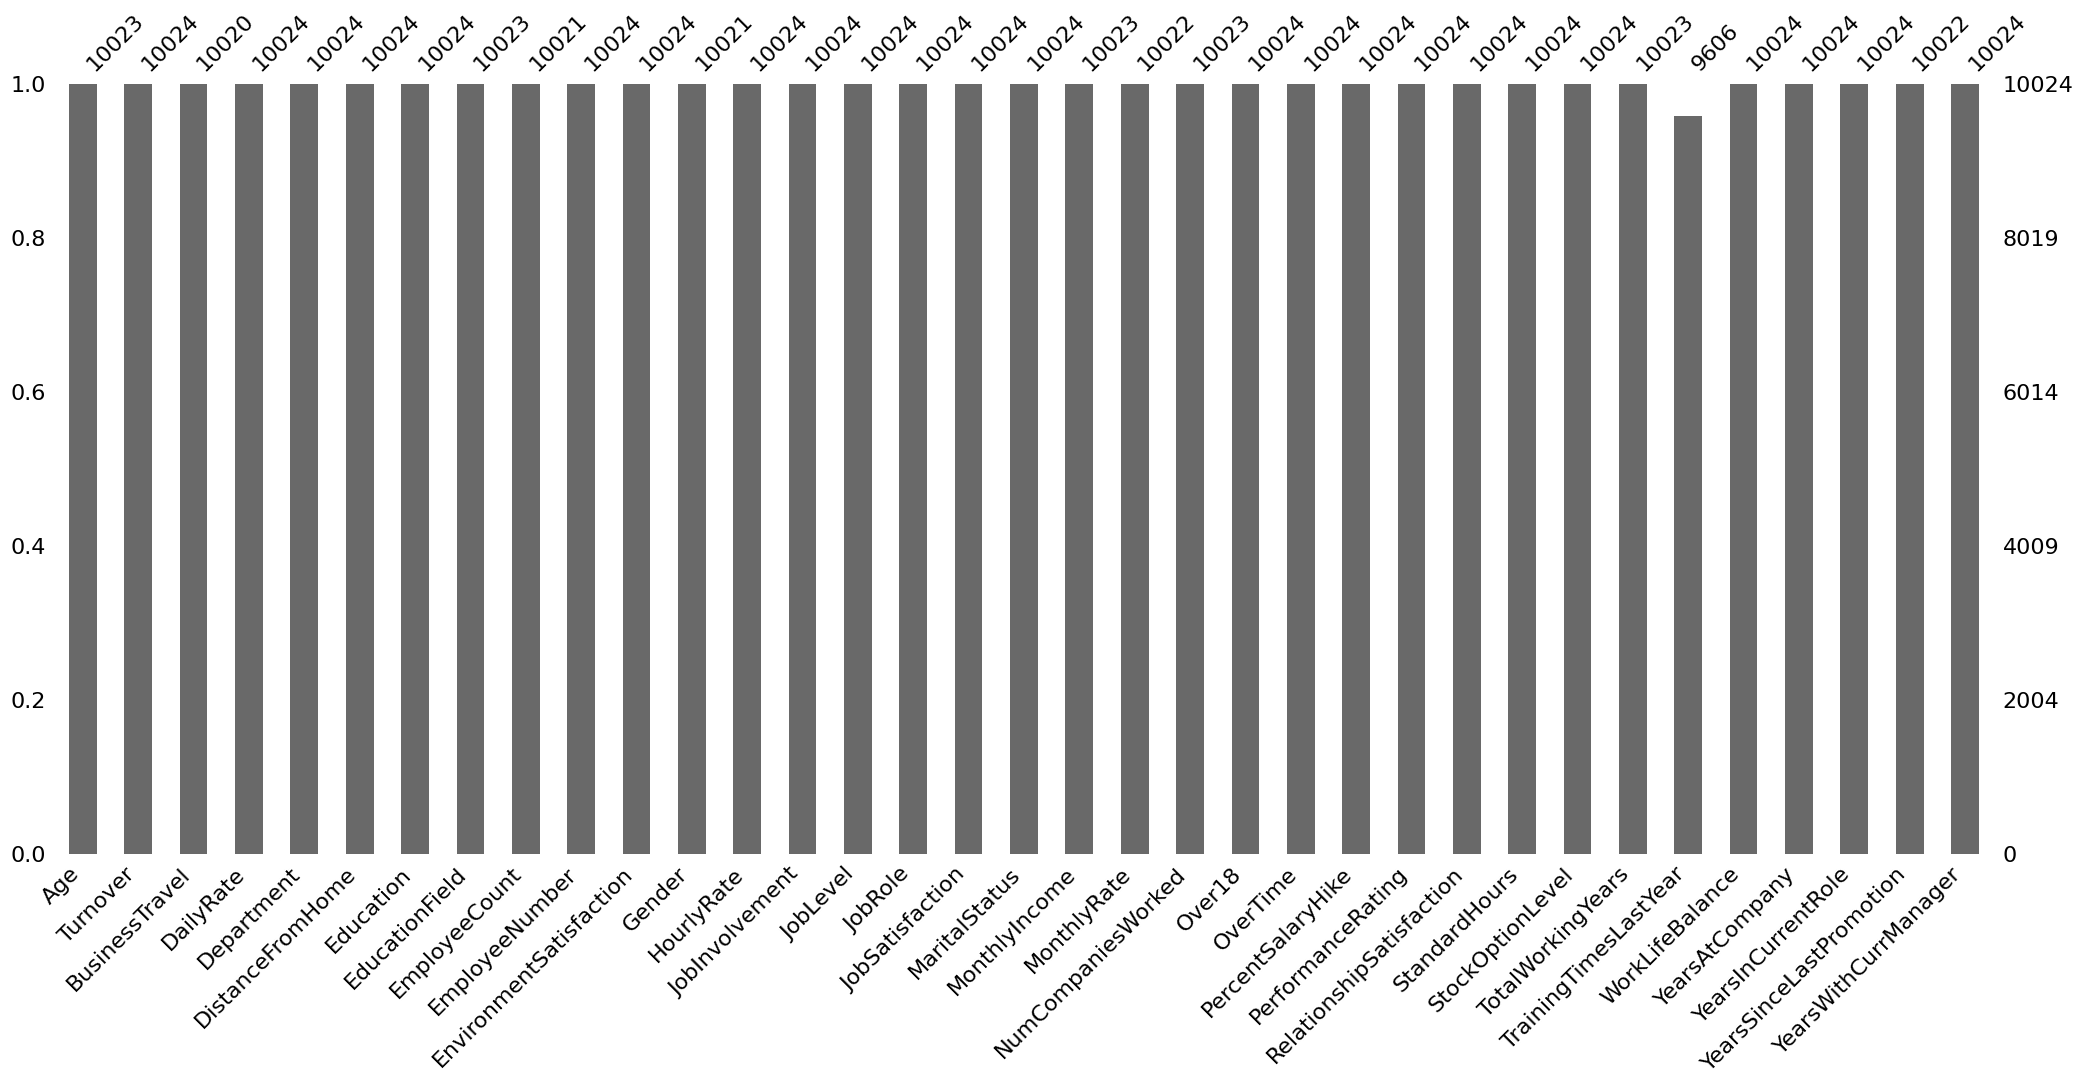

In [133]:
msno.bar(employee)

<Axes: >

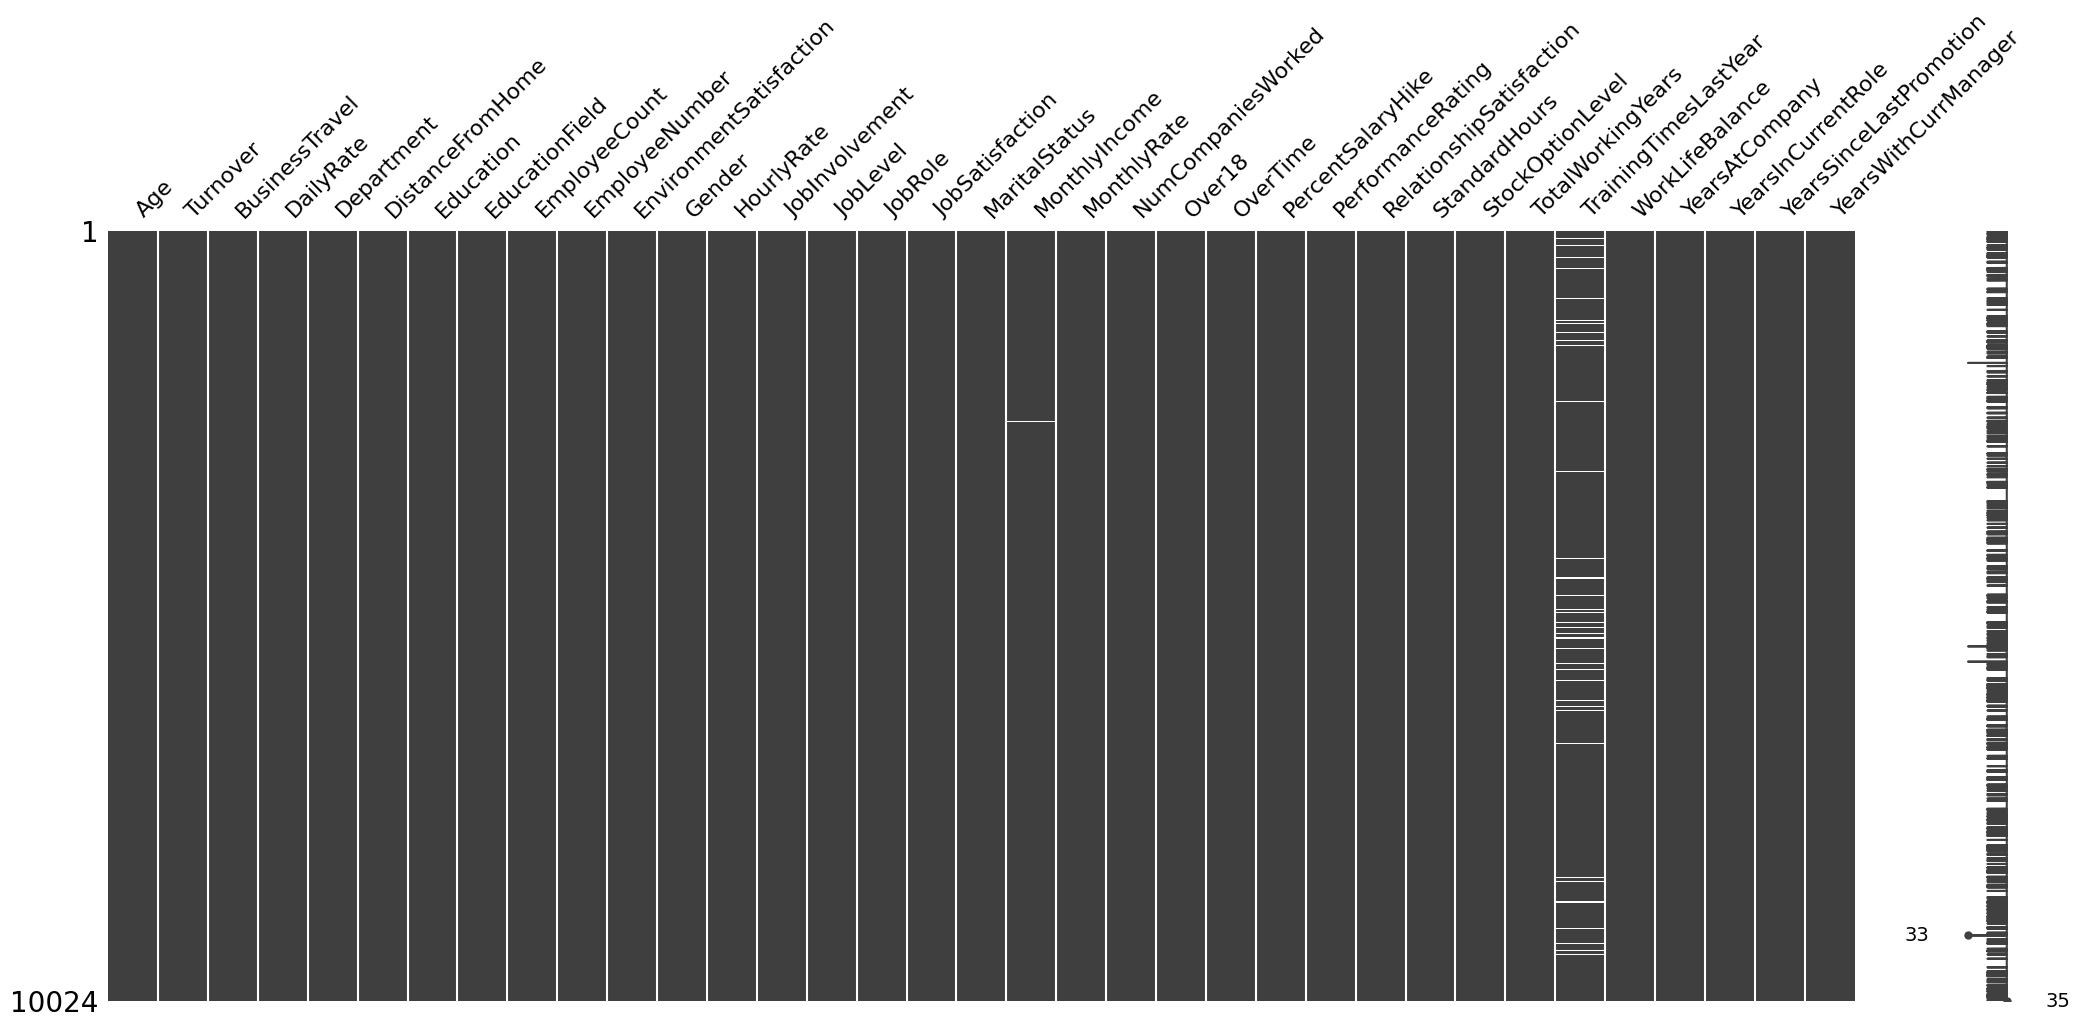

In [134]:
msno.matrix(employee)

# Note, no apparent correlations between variables, allowing for univariate imputation for missingness

In [135]:
# Impute the mean over numerical columns
#employee[employee_quant].fillna(employee[employee_quant].mean())
#df=df.fillna(df.mean())
for i in employee[employee_quant].columns[employee[employee_quant].isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    employee[i].fillna(employee[i].mean(),inplace=True)


In [136]:
employee[employee_quant].isna().sum()



Age                        0
EmployeeCount              0
EmployeeNumber             0
NumCompaniesWorked         0
StandardHours              0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
DailyRate                  0
DistanceFromHome           0
HourlyRate                 0
MonthlyIncome              0
MonthlyRate                0
PercentSalaryHike          0
TotalWorkingYears          0
dtype: int64

In [137]:
employee[employee_qual].isna().sum()


Turnover                    0
BusinessTravel              4
Department                  0
EducationField              1
Gender                      3
JobRole                     0
MaritalStatus               0
Over18                      0
OverTime                    0
Education                   0
EnvironmentSatisfaction     0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
WorkLifeBalance             0
dtype: int64

In [138]:
employee.dropna(inplace=True)

In [139]:
#Verify missingness is 0
total_missing_values = employee.isna().sum().sum()
print('Total missing values: ', total_missing_values)

Total missing values:  0


In [ ]:
# Calculate the quartiles

for col in employee:     #---Applying Only on variables with NaN values
    q1 = employee[i].quantile(0.25)
    q3= employee[i].quantile(0.75)

    # Calculate the IQR
    iqr = q3 - q1 

    # Calculate bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)


    outliers = employee[(employee[i] < lower_bound) | (employee[i] > upper_bound)]

#outliers.count()
#employee['Age']


KeyError: np.float64(50.0)

In [ ]:
# Write to CSV
employee.to_csv('C:\\Users\\dalvi\\Desktop\\test\\Employee_clean.csv')

